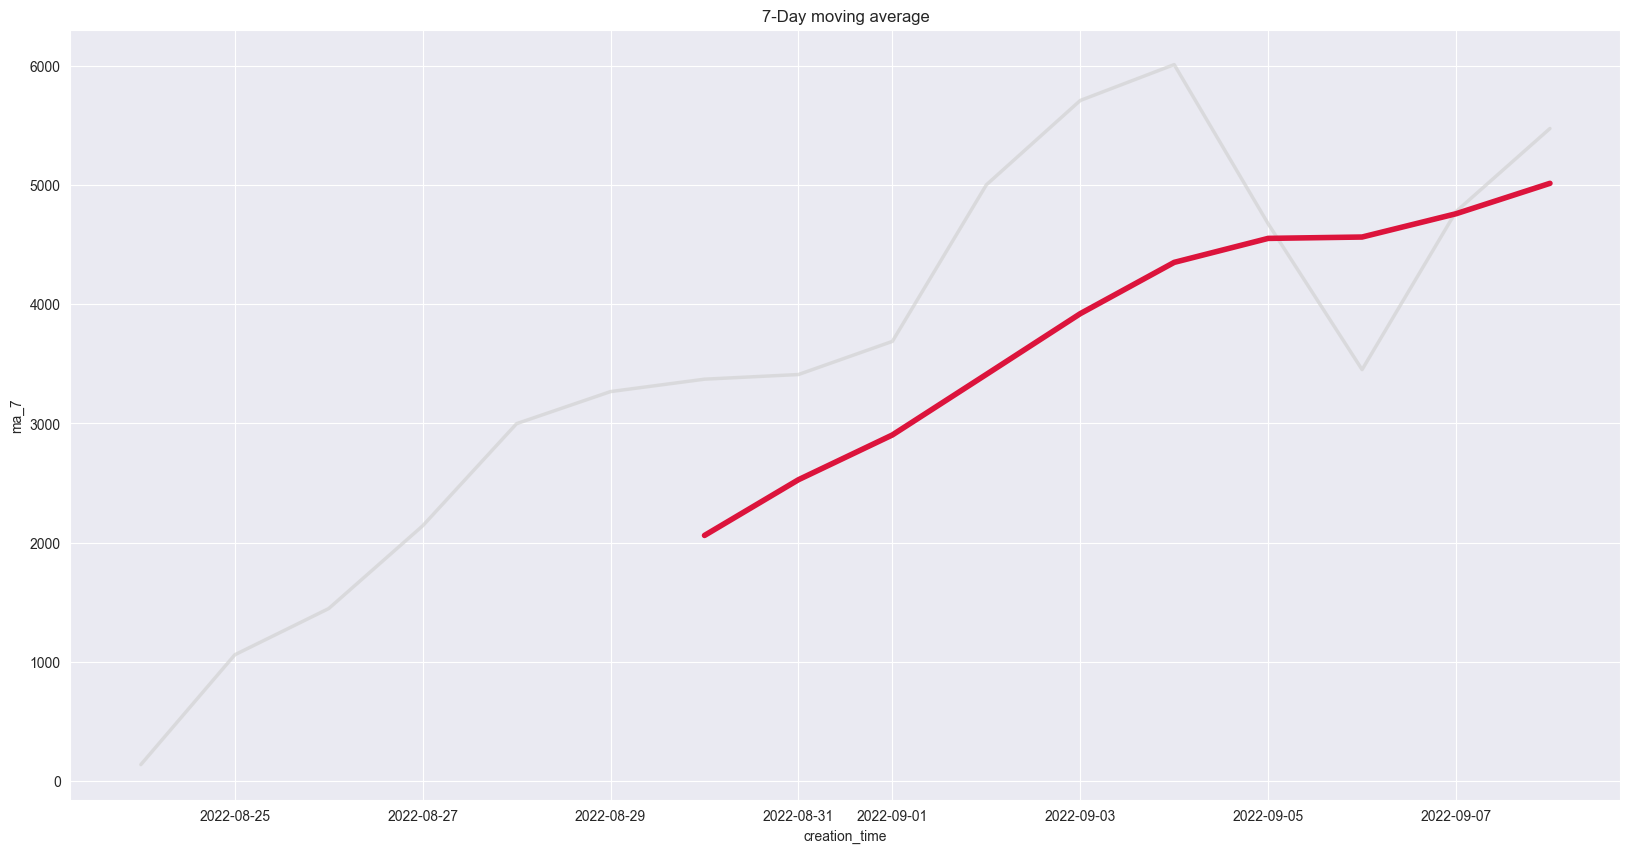

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Our Datasets/orders.csv')
df['creation_time'] = pd.to_datetime(df['creation_time'],format='%d/%m/%y %H:%M').dt.floor('D')
df['creation_time'] = df['creation_time'].sort_values()
daily_count = df.groupby(df['creation_time']).size().reset_index(name='orders_count')
daily_count['ma_7'] = daily_count['orders_count'].rolling(window=7).mean()

plt.figure(figsize = (20,10))
plt.plot(daily_count['creation_time'], daily_count['orders_count'], color='lightgray', linewidth=2.5, alpha=0.7, label='Daily Orders')
plt.plot(daily_count['creation_time'], daily_count['ma_7'], color='crimson', linewidth=4, alpha=1, label='7-Day Moving Average')
plt.title('7-Day moving average')
plt.xlabel('creation_time')
plt.ylabel('ma_7')
plt.savefig('7-Day Moving Average.png', dpi=150, bbox_inches='tight')
plt.show()

